# TP 2. PARTIE 1. scikit-learn + Naive Bayes

Le module de Machine Learning en Python : scitkit-learn (sklearn)
http://scikit-learn.org/stable/

## Plan :

   [- Iris dataset](#1)
   
   [- Naive Bayes](#2)
   
   [- Mon Naive Bayes](#3)
   
   [- Tests](#4)

In [134]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

# 1. Iris dataset


On va chercher le dataset **iris** dans le module sklearn

In [135]:
from sklearn import datasets
iris = datasets.load_iris()

1) Analyser les résultats des commandes suivantes:

In [136]:
type(iris)

sklearn.utils.Bunch

In [137]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [138]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [139]:
type(iris.data)

numpy.ndarray

In [140]:
iris.data
#features : 150*4

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [141]:
type(iris.target)

numpy.ndarray

In [142]:
iris.target
#labels : vector 150*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2. Naive Bayes


In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  class_count_ : array, shape (n_classes,)
 |      number of training samples observed in each class.
 |  
 |  theta_ : array, shape (n_classes, n_features)
 |      mean of eac

In [145]:
gnb = GaussianNB()
help(gnb.fit)

Help on method fit in module sklearn.naive_bayes:

fit(X, y, sample_weight=None) method of sklearn.naive_bayes.GaussianNB instance
    Fit Gaussian Naive Bayes according to X, y
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : array-like, shape (n_samples,)
        Target values.
    
    sample_weight : array-like, shape (n_samples,), optional (default=None)
        Weights applied to individual samples (1. for unweighted).
    
        .. versionadded:: 0.17
           Gaussian Naive Bayes supports fitting with *sample_weight*.
    
    Returns
    -------
    self : object
        Returns self.



On donne ici un exemple d'utilisation du Naive Bayes:

In [146]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
       % (iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 6


In [147]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [148]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
gnb.fit(iris.data, iris.target)

GaussianNB(priors=None)

In [150]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

2) On sépare en 2 parties égales le dataset avec tirage aléatoire sans remise

In [151]:
train = np.random.choice(range(150), 75, replace=False)
train

array([122,  49,  44, 124, 119,  70,  98, 104,  64,  23,  11,  48, 128,
       135,  82, 112, 111,  58, 129,  69,  50,  15,  24,  10,  36,  52,
       116,  51, 145, 115,  57,  21, 146,   6,  32,  31, 108,  18,  45,
        74, 120,  59,  68,  99,  39,  37,  87, 126,  34,  63, 132,  88,
       105, 100,  71, 106, 147,  62,  80,  73, 101,  91,  65,  54,  79,
       134,  60,  27,  28,   4,  41, 139, 113,  42,  66])

In [152]:
test = np.delete(range(150), train)
test

array([  0,   1,   2,   3,   5,   7,   8,   9,  12,  13,  14,  16,  17,
        19,  20,  22,  25,  26,  29,  30,  33,  35,  38,  40,  43,  46,
        47,  53,  55,  56,  61,  67,  72,  75,  76,  77,  78,  81,  83,
        84,  85,  86,  89,  90,  92,  93,  94,  95,  96,  97, 102, 103,
       107, 109, 110, 114, 117, 118, 121, 123, 125, 127, 130, 131, 133,
       136, 137, 138, 140, 141, 142, 143, 144, 148, 149])

Puis on regarde le résutat sur la prédiction

In [153]:
y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
100*(iris.target[test,] != y_pred).sum()/len(test)


4.0

3) Construire une fonction NB de paramètre A, B et nb qui répète nb tirages aléatoires avec i données pour la partie apprentissage et 150-i pour le test avec i allant de A à B. La fonction renvoie une liste de taille B-A+1 avec le pourcentage de prédiction exacte sur les données de test.

In [154]:
np.random.choice(range(150), 5, replace=False)

array([98, 25,  3, 57, 53])

In [155]:
def NB(A,B,nb):
    res = []
    for i in range(A,B+1):
        temp = 0
        for j in range(nb):
            train = np.random.choice(range(150), i, replace=False)
            test = np.delete(range(150), train)
            y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
            temp = temp + 100*(iris.target[test,] != y_pred).sum()/len(test)
        res = res + [temp/nb]
    return res
NB(2,30,3)


[37.612612612612615,
 66.893424036281189,
 67.579908675799075,
 60.0,
 60.18518518518519,
 37.995337995337991,
 41.549295774647888,
 29.787234042553191,
 26.904761904761909,
 40.28776978417266,
 13.768115942028984,
 14.355231143552309,
 20.588235294117649,
 4.9382716049382713,
 9.4527363184079611,
 18.295739348370926,
 9.8484848484848477,
 19.592875318066159,
 8.7179487179487172,
 4.909560723514212,
 9.1145833333333339,
 4.9868766404199469,
 8.2010582010582009,
 8.0,
 8.064516129032258,
 8.1300813008130088,
 5.4644808743169397,
 6.8870523415977969,
 8.3333333333333339]

4) Tracer sur un graphique le vecteur NB(A,B,10) avec A = 2 et B = 149

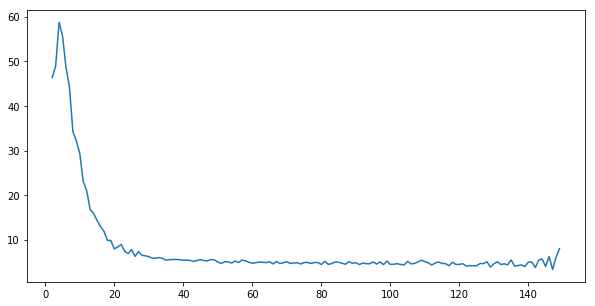

In [156]:
A = 2
B = 149
plt.figure(figsize=(10,5))
plt.plot(np.linspace(A,B,B-A+1), NB(A,B,100));

# 3. Mon Naive Bayes

In [157]:
data_train = iris.data[train,]
data_train.shape
target_train = iris.target[train,]
id_y0 = np.where(target_train == 0)
id_y0

(array([ 1,  2,  9, 10, 11, 21, 22, 23, 24, 31, 33, 34, 35, 37, 38, 44, 45,
        48, 67, 68, 69, 70, 73], dtype=int64),)

In [158]:
print(data_train[id_y0,].shape)
np.mean(data_train[id_y0,],axis=1)

(1, 23, 4)


array([[ 5.07391304,  3.45652174,  1.50869565,  0.25217391]])

5) Si Bayes est si naif que ça, pourquoi pas le construire nous-même ! En s'aidant du cours, construire la fonction MonNaiveBayes sur le modèle suivant

In [159]:
def delta(x,mu_hat,sigma_hat,pi_hat):
    """
    x : valeur à laquelle sera évaluée delta, np.array  size (n,d)
    mu_hat : moyenne des features, np.array size d
    sigma_hat : std des featues, np.array size d
    pi_hat : proportion parmi le train, np.float
    """ 
    d = x.shape[0]
    log_density_features = -d*np.log(np.sqrt(2*np.pi))-np.sum(np.log(sigma_hat))-np.sum((x-mu_hat)**2/(2*sigma_hat**2),axis=1)
    log_proba = np.log(pi_hat)
    return log_density_features+log_proba

In [160]:
x = data_train[0:10,:]
print(x)

[[ 7.7  2.8  6.7  2. ]
 [ 5.   3.3  1.4  0.2]
 [ 5.1  3.8  1.9  0.4]
 [ 6.7  3.3  5.7  2.1]
 [ 6.   2.2  5.   1.5]
 [ 5.9  3.2  4.8  1.8]
 [ 5.1  2.5  3.   1.1]
 [ 6.5  3.   5.8  2.2]
 [ 5.6  2.9  3.6  1.3]
 [ 5.1  3.3  1.7  0.5]]


In [161]:
x = np.array([1.2,2.1,-1.5,-1])
print(x.shape[0])
d = x.shape[0]
id_y0 = np.where(target_train==0)
mu_hat0 = np.mean(data_train[id_y0,],axis=1)
sigma_hat0 = np.std(data_train[id_y0,],axis=1)
pi_hat0 = data_train[id_y0,].shape[1]/data_train.shape[0]

4


In [162]:
print(delta(x,mu_hat,sigma_hat,pi_hat))

[-298.58446581]


In [163]:
print(x)
print(np.argmax(x)) #axis=1 max sur les colonnes

[ 1.2  2.1 -1.5 -1. ]
1


In [164]:
#?np.argmax

In [165]:
def MonNaiveBayes(data_train, train_label, test_feature):
    """
    fonction discriminante Naive Bayes    
    """
    
    target_values = np.unique(target_train)
    n_train,d_train = data_train.shape
    n_test,d_test = test_feature.shape
    sigma_hat = []
    mu_hat = []
    pi_hat = []

    for y in target_values:
        print(y)
        id_y = np.where(target_train == y)
        mu_hat.append(np.mean(data_train[id_y,],axis=1))
        sigma_hat.append(np.std(data_train[id_y,],axis=1))
        pi_hat.append(data_train[id_y,].shape[1]/data_train.shape[0])
    
    delta_hat_test = np.zeros((n_test,target_values.shape[0]))
    delta_hat_train = np.zeros((n_train,target_values.shape[0]))
    k = 0
    for y in target_values:
        delta_hat_test[:,k] = delta(test_feature,mu_hat[k],sigma_hat[k],pi_hat[k])
        delta_hat_train[:,k] = delta(data_train,mu_hat[k],sigma_hat[k],pi_hat[k])

        k += 1
        predict_test = np.argmax(delta_hat_test,axis=1)
        predict_train = np.argmax(delta_hat_train,axis=1)
        res = {"predict_test":predict_test,
               "predict_train":predict_train}
        return res

In [166]:
results = MonNaiveBayes(data_train, target_train, iris.data[test,])
results["predict_test"]

0
1
2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

6) Comparer le résultat au résultat de la fonction de sklearn

In [130]:
import copy
iris2 = copy.deepcopy(iris)

iris2.data = iris2.data[3:30,]
iris2.target = iris2.target[3:30,]
MonNaiveBayes(iris, iris2)

TypeError: MonNaiveBayes() missing 1 required positional argument: 'test_feature'

# 3. Tests